In [554]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', dpi=100)
import seaborn as sns; sns.set()

# Check the versions are OK (both should be 2 or more)
print(tf.__version__)

# Set seed for reproducibility
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

2.13.0


## 1. Load, investigate, manipulate and display the data

In [555]:
data = []
with open("/Users/tienle/Downloads/csie.ntu.edu.tw_~cjlin_libsvmtools_datasets_binary_diabetes.txt", "r") as file:
    data = file.readlines()
data

['-1  1:6.000000 2:148.000000 3:72.000000 4:35.000000 5:0.000000 6:33.599998 7:0.627000 8:50.000000\n',
 '+1  1:1.000000 2:85.000000 3:66.000000 4:29.000000 5:0.000000 6:26.600000 7:0.351000 8:31.000000\n',
 '-1  1:8.000000 2:183.000000 3:64.000000 4:0.000000 5:0.000000 6:23.299999 7:0.672000 8:32.000000\n',
 '+1  1:1.000000 2:89.000000 3:66.000000 4:23.000000 5:94.000000 6:28.100000 7:0.167000 8:21.000000\n',
 '-1  1:0.000000 2:137.000000 3:40.000000 4:35.000000 5:168.000000 6:43.099998 7:2.288000 8:33.000000\n',
 '+1  1:5.000000 2:116.000000 3:74.000000 4:0.000000 5:0.000000 6:25.600000 7:0.201000 8:30.000000\n',
 '-1  1:3.000000 2:78.000000 3:50.000000 4:32.000000 5:88.000000 6:31.000000 7:0.248000 8:26.000000\n',
 '+1  1:10.000000 2:115.000000 3:0.000000 4:0.000000 5:0.000000 6:35.299999 7:0.134000 8:29.000000\n',
 '-1  1:2.000000 2:197.000000 3:70.000000 4:45.000000 5:543.000000 6:30.500000 7:0.158000 8:53.000000\n',
 '-1  1:8.000000 2:125.000000 3:96.000000 4:0.000000 5:0.000000 

In [556]:
import re
data_full = []
for i in range(0, len(data)):
    data_full.append(data[i].split())
data_full = pd.DataFrame(data_full, columns  = ['outcome', 'pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
                                               'insulin', 'bmi', 'diabetes_pedigree_function', 'age'])

for c in data_full.columns:
    data_full.loc[:,c] = pd.to_numeric(data_full.loc[:,c].apply(lambda x: re.sub(r'\d:', '',x)), errors = 'coerce')
        
data_full

/var/folders/8x/r9ldftlx6vlc_r3x6jtnv9080000gn/T/ipykernel_25451/1499052777.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_full.loc[:,c] = pd.to_numeric(data_full.loc[:,c].apply(lambda x: re.sub(r'\d:', '',x)), errors = 'coerce')


,outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,-1,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,-1,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,-1,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0
...,...,...,...,...,...,...,...,...,...
763,1,10.0,101.0,76.0,48.0,180.0,32.900002,0.171,63.0
764,1,2.0,122.0,70.0,27.0,0.0,36.799999,0.340,27.0
765,1,5.0,121.0,72.0,23.0,112.0,26.200001,0.245,30.0
766,-1,1.0,126.0,60.0,0.0,0.0,30.100000,0.349,47.0


In [557]:
# Check missing value in the dataset
data_full.isnull().any()

outcome                       False
pregnancies                   False
glucose                       False
blood_pressure                False
skin_thickness                False
insulin                       False
bmi                           False
diabetes_pedigree_function    False
age                           False
dtype: bool

In [558]:
X = data_full.iloc[:,1:]
y = data_full.loc[:,'outcome']

In [559]:
# Compute correlation coefficients
data_full.corr()

,outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
outcome,1.000000,-0.221898,-0.466581,-0.065068,-0.074752,-0.130548,-0.292695,-0.173844,-0.238356
pregnancies,-0.221898,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose,-0.466581,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
blood_pressure,-0.065068,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin_thickness,-0.074752,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,-0.130548,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
bmi,-0.292695,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
diabetes_pedigree_function,-0.173844,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,-0.238356,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [560]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify = y)

In [561]:
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [562]:
print("Some statistic values of training data columns: \n")
train_set = pd.concat([y_train, X_train], axis = 1)
train_set.describe()

Some statistic values of training data columns: 



,outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.302932,3.846906,120.320847,68.952769,20.260586,76.117264,31.857003,0.471402,33.048860
std,0.953789,3.310867,31.977811,20.069278,15.643683,110.458377,8.150750,0.335092,11.624251
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,-1.000000,1.000000,99.000000,64.000000,0.000000,0.000000,27.225001,0.245000,24.000000
50%,1.000000,3.000000,117.000000,72.000000,22.000000,18.000000,32.000000,0.365500,29.000000
75%,1.000000,6.000000,139.000000,80.000000,32.000000,120.000000,36.574998,0.628500,40.750000
max,1.000000,17.000000,199.000000,122.000000,63.000000,846.000000,67.099998,2.420000,72.000000


In [563]:
print('The first 6 rows of training data: \n')
train_set.head()

The first 6 rows of training data: 



,outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,1,10.0,162.0,84.0,0.0,0.0,27.700001,0.182,54.0
1,1,6.0,137.0,61.0,0.0,0.0,24.200001,0.151,55.0
2,1,6.0,129.0,90.0,7.0,326.0,19.600000,0.582,60.0
3,1,4.0,151.0,90.0,38.0,0.0,29.700001,0.294,36.0
4,-1,5.0,97.0,76.0,27.0,0.0,35.599998,0.378,52.0


In [564]:
# Load the testing data
print("Some statistic values of training data columns: \n")
test_set = pd.concat([y_test, X_test], axis = 1)
test_set.describe()

Some statistic values of training data columns: 



,outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.298701,3.837662,123.181818,69.714286,21.636364,94.480519,32.533117,0.473766,34.006494
std,0.957460,3.605498,31.953286,16.245950,17.136827,132.000754,6.713532,0.316927,12.296711
min,-1.000000,0.000000,57.000000,0.000000,0.000000,0.000000,19.299999,0.078000,21.000000
25%,-1.000000,1.000000,100.000000,62.000000,0.000000,0.000000,27.400000,0.238500,24.000000
50%,1.000000,2.000000,117.500000,70.000000,24.500000,46.500000,32.100001,0.395000,30.000000
75%,1.000000,6.000000,144.000000,80.000000,33.000000,144.750000,36.574998,0.614500,41.000000
max,1.000000,15.000000,197.000000,110.000000,99.000000,680.000000,57.299999,1.699000,81.000000


In [565]:
print('The first 6 rows of testing data: \n')
test_set.head()

The first 6 rows of testing data: 



,outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,1,5.0,147.0,78.0,0.0,0.0,33.700001,0.218,65.0
1,1,0.0,101.0,76.0,0.0,0.0,35.700001,0.198,26.0
2,1,0.0,98.0,82.0,15.0,84.0,25.200001,0.299,22.0
3,1,7.0,137.0,90.0,41.0,0.0,32.000000,0.391,39.0
4,1,10.0,92.0,62.0,0.0,0.0,25.900000,0.167,31.0


In [566]:
# Create a validation set from the testing set
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2020, stratify = y_test)

print("The shape of validation set after spliting: \n")
print(X_val.shape)
print(y_val.shape)
print("\n")
print("The shape of testing set after spliting: \n")
print(X_test.shape)
print(y_test.shape)
print("\n")

The shape of validation set after spliting: 

(77, 8)
(77,)


The shape of testing set after spliting: 

(77, 8)
(77,)




In [567]:
# Split the training data into X_train and y_train
# Split the testing data into X_test and y_test
# Split the validation data into X_val and y_val
X_train = train_set.iloc[:, 1:]
y_train = train_set.iloc[:, 0]

print("The shape of X_train is: ", X_train.shape)
print("The shape of y_train is: ", y_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_test is: ", y_test.shape)
print("The shape of X_val is: ", X_val.shape)
print("The shape of y_val is: ", y_val.shape)

The shape of X_train is:  (614, 8)
The shape of y_train is:  (614,)
The shape of X_test is:  (77, 8)
The shape of y_test is:  (77,)
The shape of X_val is:  (77, 8)
The shape of y_val is:  (77,)


In [568]:
# Checking data type of X_train, X_test and X_val
print("Information of X_train columns: \n")
print(X_train.info())
print("\n")
print("Information of X_test columns: \n")
print(X_test.info())
print("\n")
print("Information of X_val columns: \n")
print(X_val.info())
print("\n")

Information of X_train columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 614 non-null    float64
 1   glucose                     614 non-null    float64
 2   blood_pressure              614 non-null    float64
 3   skin_thickness              614 non-null    float64
 4   insulin                     614 non-null    float64
 5   bmi                         614 non-null    float64
 6   diabetes_pedigree_function  614 non-null    float64
 7   age                         614 non-null    float64
dtypes: float64(8)
memory usage: 38.5 KB
None


Information of X_test columns: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 128 to 13
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -

In [519]:
# Convert X_train, X_test, X_val to 3D array
#X_train = np.array(X_train).reshape((-1, 28, 28, 1))
#print('The shape of X_train after converting to an array is: ', X_train.shape)
#X_test = np.array(X_test).reshape((-1, 28, 28, 1))
#print('The shape of X_test after converting to an array is: ', X_test.shape)
#X_val = np.array(X_val).reshape((-1, 28, 28, 1))
#print('The shape of X_val after converting to an array is: ', X_val.shape)

In [569]:
# Create a list of letters (labels of images)
print("List of letters (labels of images) is: \n")
class_names = ['No Diabetes', 'diabetes']
print(class_names)

List of letters (labels of images) is: 

['No Diabetes', 'diabetes']


In [570]:
# List of values of response variable after modifying
print("List of values of y_train: \n")
print(list(y_train.sort_values().unique()))
print('\n')
print("List of values of y_test: \n")
print(list(y_test.sort_values().unique()))
print('\n')
print("List of values of y_val: \n")
print(list(y_val.sort_values().unique()))

List of values of y_train: 

[-1, 1]


List of values of y_test: 

[-1, 1]


List of values of y_val: 

[-1, 1]


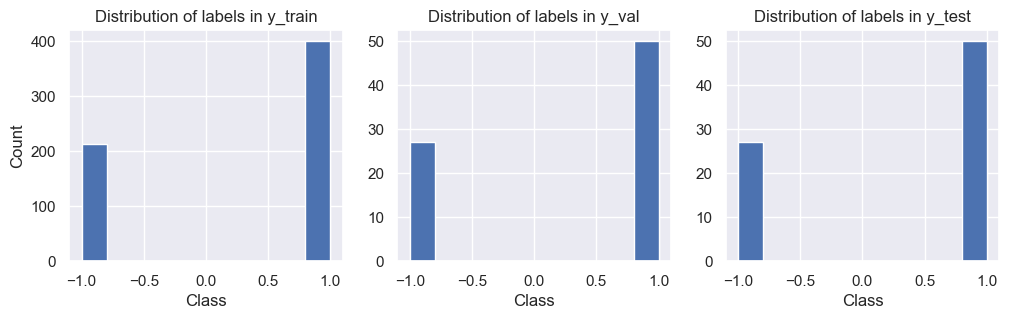

In [571]:
# Checking distribution of lables in y_train, y_test, and y_val
fig, sub = plt.subplots(1, 3)
fig.set_size_inches(12,3)
sub[0].hist(y_train)
sub[0].set_ylabel('Count')
sub[0].set_xlabel('Class')
sub[0].set_title('Distribution of labels in y_train')
sub[1].hist(y_val)
sub[1].set_xlabel('Class')
sub[1].set_title('Distribution of labels in y_val')
sub[2].hist(y_test)
sub[2].set_xlabel('Class')
sub[2].set_title('Distribution of labels in y_test')
plt.show()

In [572]:
# Preprocessing
for i in ['glucose','blood_pressure','skin_thickness','insulin','bmi']:
    X_train.loc[:,i][X_train.loc[:,i] == 0] = np.nan
    X_test.loc[:,i][X_test.loc[:,i] == 0] = np.nan
    X_val.loc[:,i][X_val.loc[:,i] == 0] = np.nan
    
    
X_train.loc[:, 'glucose'][X_train.loc[:, 'glucose'].isnull()]

59    NaN
132   NaN
323   NaN
370   NaN
529   NaN
Name: glucose, dtype: float64

In [573]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_train = imputer.fit_transform(X_train)
print(X_train)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(X_train)

[[1.0000000e+01 1.6200000e+02 8.4000000e+01 ... 2.7700001e+01
  1.8200000e-01 5.4000000e+01]
 [6.0000000e+00 1.3700000e+02 6.1000000e+01 ... 2.4200001e+01
  1.5100000e-01 5.5000000e+01]
 [6.0000000e+00 1.2900000e+02 9.0000000e+01 ... 1.9600000e+01
  5.8200000e-01 6.0000000e+01]
 ...
 [8.0000000e+00 1.8800000e+02 7.8000000e+01 ... 4.7900002e+01
  1.3700000e-01 4.3000000e+01]
 [2.0000000e+00 1.0800000e+02 8.0000000e+01 ... 2.7000000e+01
  2.5900000e-01 5.2000000e+01]
 [5.0000000e+00 1.0600000e+02 8.2000000e+01 ... 3.9500000e+01
  2.8600000e-01 3.8000000e+01]]
[[ 1.85996924  1.355886    0.93388767 ... -0.68512774 -0.86435394
   1.80383419]
 [ 0.65084154  0.52357175 -0.94828183 ... -1.19129516 -0.95694123
   1.88993138]
 [ 0.65084154  0.25723119  1.42488841 ... -1.85654391  0.33032074
   2.3204173 ]
 ...
 [ 1.25540539  2.22149282  0.44288693 ...  2.23618153 -0.99875484
   0.85676515]
 [-0.55828616 -0.44191278  0.60655384 ... -0.78636137 -0.63437906
   1.63163982]
 [ 0.34855961 -0.50849792 

In [574]:
# Transform testing data and validation data
X_test = imputer.transform(X_test)
X_val = imputer.transform(X_val)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [587]:
X_val[:,1].std()

1.0933802729285524

In [575]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 6)
#pca.fit(X_train)
#X_train = pca.transform(X_train)
#X_train
# Transform testing data and validation data
#X_test = pca.transform(X_test)
#X_val = pca.transform(X_val)

## 2. Build a baseline model

For a baseline model, a densely connected model with Stochastic Gradient Descent optimizer is built, its learning rate is 0.01 by default, batch size is 32 and the number of epochs are 30. In this network, there is 3 hidden layers. The first hidden layer contains 64 neurons and uses Elu activation function. The second hidden layer contains 32 neurons and uses Elu activation function. The third hidden layer contains 16 neurons and uses Elu activation function. The output layer contains 24 neurons (since there are 24 possible outcomes of labels) and uses Softmax activation function. The loss function is Sparse categorical crossentropy since labels are encoded as integers from 0 to 23. 

In [577]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_train

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [588]:
y_test = encoder.transform(y_test)
y_val = encoder.transform(y_val)

In [589]:
# Build a baseline model
actfn_bs = "softmax"
optimizer_bs = keras.optimizers.SGD
learningrate_bs = 0.01
batch_size_bs = 50
n_epochs_bs = 100
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 

model_bs = keras.models.Sequential()
model_bs.add(keras.layers.Flatten(input_shape = (8,)))
model_bs.add(keras.layers.Dense(30, activation = actfn_bs))
model_bs.add(keras.layers.Dense(15, activation = actfn_bs))
model_bs.add(keras.layers.Dense(8, activation = actfn_bs))
model_bs.add(keras.layers.Dense(1, activation = "softmax"))
model_bs.compile(loss="binary_crossentropy", optimizer=optimizer_bs(learning_rate=learningrate_bs), 
                 metrics=["accuracy"])
history_bs = model_bs.fit(X_train, y_train, epochs=n_epochs_bs, callbacks = early_stopping_cb, validation_data=(X_val, y_val))

Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.6515 - val_loss: 0.6581 - val_accuracy: 0.6494
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.6515 - val_loss: 0.6569 - val_accuracy: 0.6494
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.6515 - val_loss: 0.6558 - val_accuracy: 0.6494
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6515 - val_loss: 0.6551 - val_accuracy: 0.6494
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6515 - val_loss: 0.6541 - val_accuracy: 0.6494
Epoch 6/100
20/20 [==============================] - 0s 975us/step - loss: 0.6530 - accuracy: 0.6515 - val_loss: 0.6535 - val_accuracy: 0.6494
Epoch 7/100
20/20 [==============================] - 0s 963us/step - loss: 0.6524 - accuracy: 0.6515 - val_loss: 0.6531 - val_accuracy: 0.6494
Epoch 8/1

20/20 [==============================] - 0s 995us/step - loss: 0.6466 - accuracy: 0.6515 - val_loss: 0.6478 - val_accuracy: 0.6494
Epoch 59/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6466 - accuracy: 0.6515 - val_loss: 0.6478 - val_accuracy: 0.6494
Epoch 60/100
20/20 [==============================] - 0s 947us/step - loss: 0.6466 - accuracy: 0.6515 - val_loss: 0.6478 - val_accuracy: 0.6494
Epoch 61/100
20/20 [==============================] - 0s 927us/step - loss: 0.6466 - accuracy: 0.6515 - val_loss: 0.6478 - val_accuracy: 0.6494
Epoch 62/100
20/20 [==============================] - 0s 908us/step - loss: 0.6466 - accuracy: 0.6515 - val_loss: 0.6478 - val_accuracy: 0.6494
Epoch 63/100
20/20 [==============================] - 0s 899us/step - loss: 0.6466 - accuracy: 0.6515 - val_loss: 0.6478 - val_accuracy: 0.6494
Epoch 64/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.6515 - val_loss: 0.6478 - val_accuracy: 0.6494


In [592]:
# Making predictions from the final CNN model with Elu activation function, Nadam optimizer and learning rate of 0.001 on the testing set
y_pred = np.argmax(model_bs.predict(X_test, verbose = 0),axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

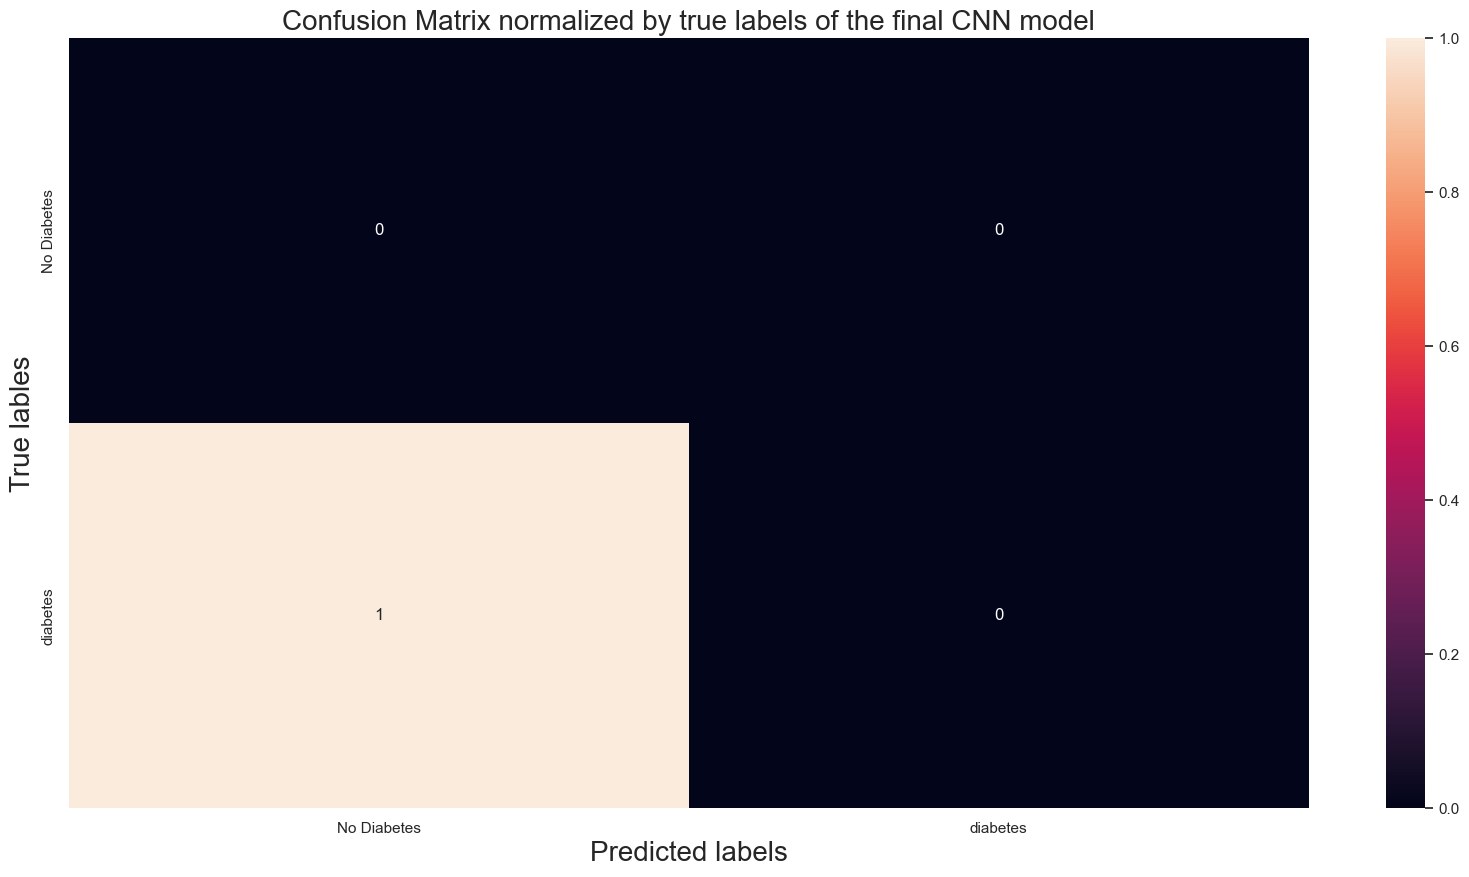

In [493]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

y_test_label = y_test.apply(lambda x: class_names[x])
y_pred_label = pd.Series(y_pred).apply(lambda x: class_names[x])

conf_mat_norm = confusion_matrix(y_test_label, y_pred_label, normalize = 'true')
conf_mat_norm = pd.DataFrame(conf_mat_norm, index = class_names, columns = class_names)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(conf_mat_norm, annot = True)
plt.xlabel('Predicted labels', fontsize = 20)
plt.ylabel('True lables', fontsize = 20)
plt.title('Confusion Matrix normalized by true labels of the final CNN model', fontsize = 20, loc = "center")
plt.show()